Edges of tree in order they are added:

1. Edge C,F (Weight: 2)
2. Edge A,E (Weight: 3)
3. Edge C,D (Weight: 4)
4. Edge B,C (Weight: 5)
5. Edge E,F (Weight: 7)

Total weight/length: 21



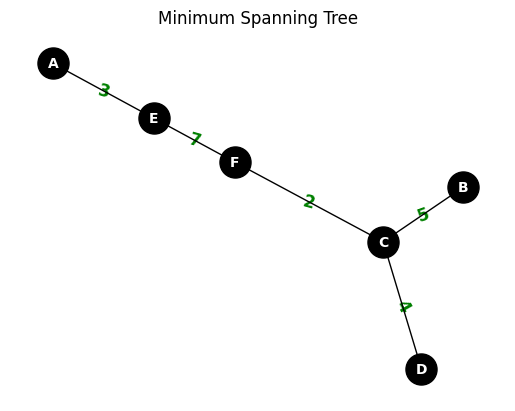

In [5]:
from unionfind import unionfind
import matplotlib.pyplot as plt
import networkx as nx



def make_graph():
    # tuple = (weight, n1, n2)
    return {
        'A': [(9, 'B', 'A'), (8, 'C', 'A'), (12, 'D', 'A'), (3, 'E', 'A'), (15, 'F', 'A')],
        'B': [(9, 'A', 'B'), (5, 'C', 'B'), (6, 'D', 'B'), (13, 'E', 'B'), (10, 'F', 'B')],
        'C': [(5, 'B', 'C'), (8, 'A', 'C'), (4, 'D', 'C'), (14, 'E', 'C'), (2, 'F', 'C')],
        'D': [(4, 'C', 'D'), (6, 'B', 'D'), (12, 'A', 'D'), (16, 'E', 'D'), (11, 'F', 'D')],
        'E': [(16, 'D', 'E'), (14, 'C', 'E'), (13, 'B', 'E'), (3, 'A', 'E'), (7, 'F', 'E')],
        'F': [(7, 'E', 'F'), (11, 'D', 'F'), (2, 'C', 'F'), (10, 'B', 'F'), (15, 'A', 'F')],
    }
    ''' Network (G, w):
    
    Vertices - V(G) = {a, b, c, d, e, f}
    
    Edges - E(G) = {ab, ac, ad, ae, af, bc, bd, be, bf, cd, ce, cf, de, df, ef}
    
    Weights - w(ab) = 9, w(bc) = 5, w(ce) = 14, w(ac) = 8, w(bd) = 6, w(cf) = 2, w(ad) = 12, w(be) = 13, w(de) = 16, w(ae) = 3, w(bf) = 10, w(df) = 11, w(af) = 15, w(cd) = 4, w(ef) = 7 '''



def load_edges(G):
    num_nodes = 0
    edges = []

    for _, value in G.items():
        num_nodes += 1
        edges.extend(value)

    return num_nodes, sorted(edges)


def conv_char(c):
    return ord(c) - 65


def kruskals(G):
    total_weight = 0
    MST = []

    num_nodes, edges = load_edges(G)
    uf = unionfind(num_nodes)

    for edge in edges:
        weight, n1, n2 = edge[0], edge[1], edge[2]

        if not uf.issame(conv_char(n1), conv_char(n2)):
            total_weight += weight
            uf.unite(conv_char(n1), conv_char(n2))
            MST.append((n1, n2, weight))

    return MST, total_weight


def draw_graph(MST):
    G = nx.Graph()

    for edge in MST:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    pos = nx.spring_layout(G)

    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12, font_weight='bold',font_color='green')

    nx.draw(G, pos, with_labels=True, node_size=500, node_color='Black', font_size=10, font_color='White', font_weight='bold')
    plt.title("Minimum Spanning Tree")
    plt.show()

def main():
    G = make_graph()
    MST, total_weight = kruskals(G)

    print("Edges of tree in order they are added:")
    print()
    for i, edge in enumerate(MST, start=1):
        print(f"{i}. Edge {edge[0]},{edge[1]} (Weight: {edge[2]})")
    print()
    print(f'Total weight/length: {total_weight}')
    print()

    draw_graph(MST)

main()